In [1]:
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import keras
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import os

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
# Save training data and labels
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)

# Save testing data and labels
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


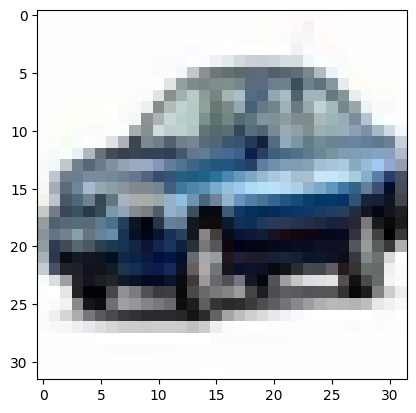

In [5]:
i = 105
plt.imshow(X_train[i])

c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


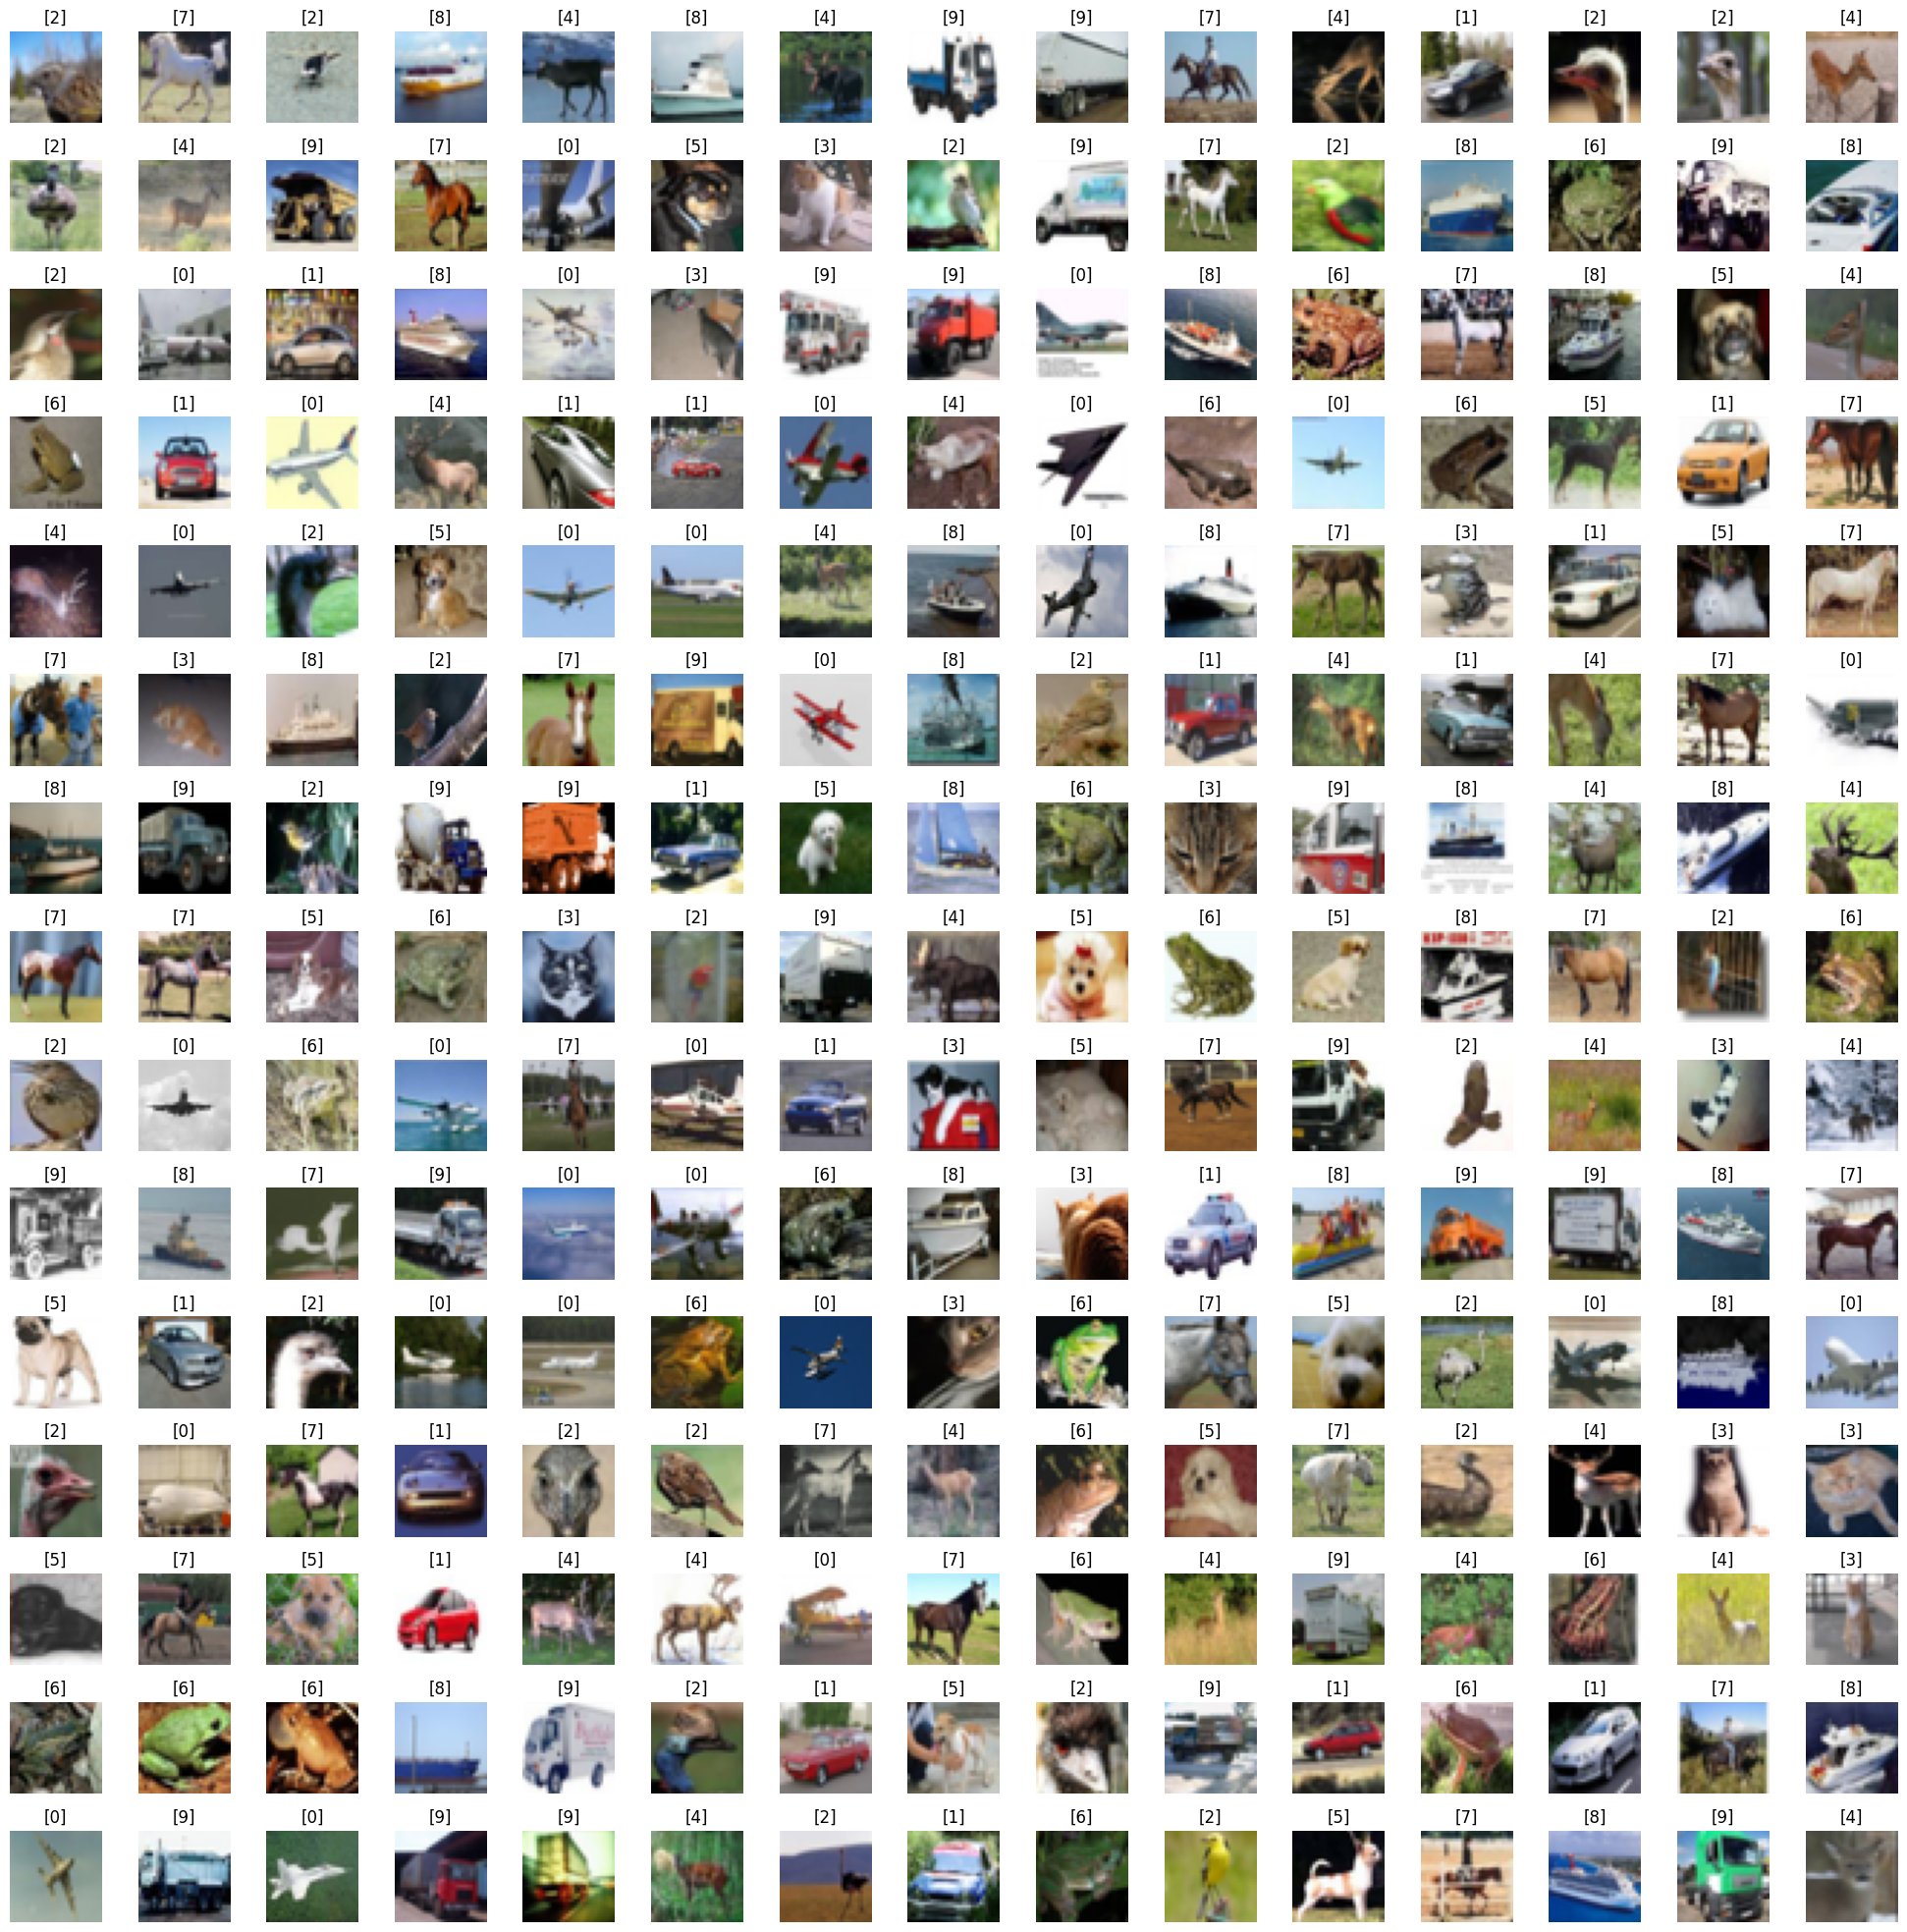

In [6]:
W = 15
L = 15
fig,axes = plt.subplots(L,W,figsize=(25,25))
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(L*W):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis("off")
plt.subplots_adjust(hspace=.4)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
cat_num = 10

In [9]:
y_train = keras.utils.to_categorical(y_train,cat_num)

In [10]:
y_test = keras.utils.to_categorical(y_test,cat_num)

In [11]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
input_shape=X_train.shape[1:]
input_shape

(32, 32, 3)

In [14]:
cnn = Sequential()
cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(.3))

cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=input_shape))
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=input_shape))
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(.2))

cnn.add(Flatten())
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dense(units=10,activation='softmax'))


In [15]:
cnn.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
history = cnn.fit(X_train,y_train,batch_size=32,epochs=2,shuffle=True)

Epoch 1/2
1563/1563 [==============================] - 425s 269ms/step - loss: 1.5371 - accuracy: 0.4409
Epoch 2/2
1563/1563 [==============================] - 416s 266ms/step - loss: 1.1303 - accuracy: 0.6071


In [17]:
evaluation = cnn.evaluate(X_test,y_test)
print(f'Test Accuracy {evaluation[1]:.2f}')

313/313 [==============================] - 21s 67ms/step - loss: 1.1251 - accuracy: 0.6129
Test Accuracy 0.61


In [18]:
predictions = cnn.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

313/313 [==============================] - 21s 65ms/step


array([3, 8, 8, ..., 5, 0, 7], dtype=int64)

In [19]:
y_test = y_test.argmax(1)

In [20]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

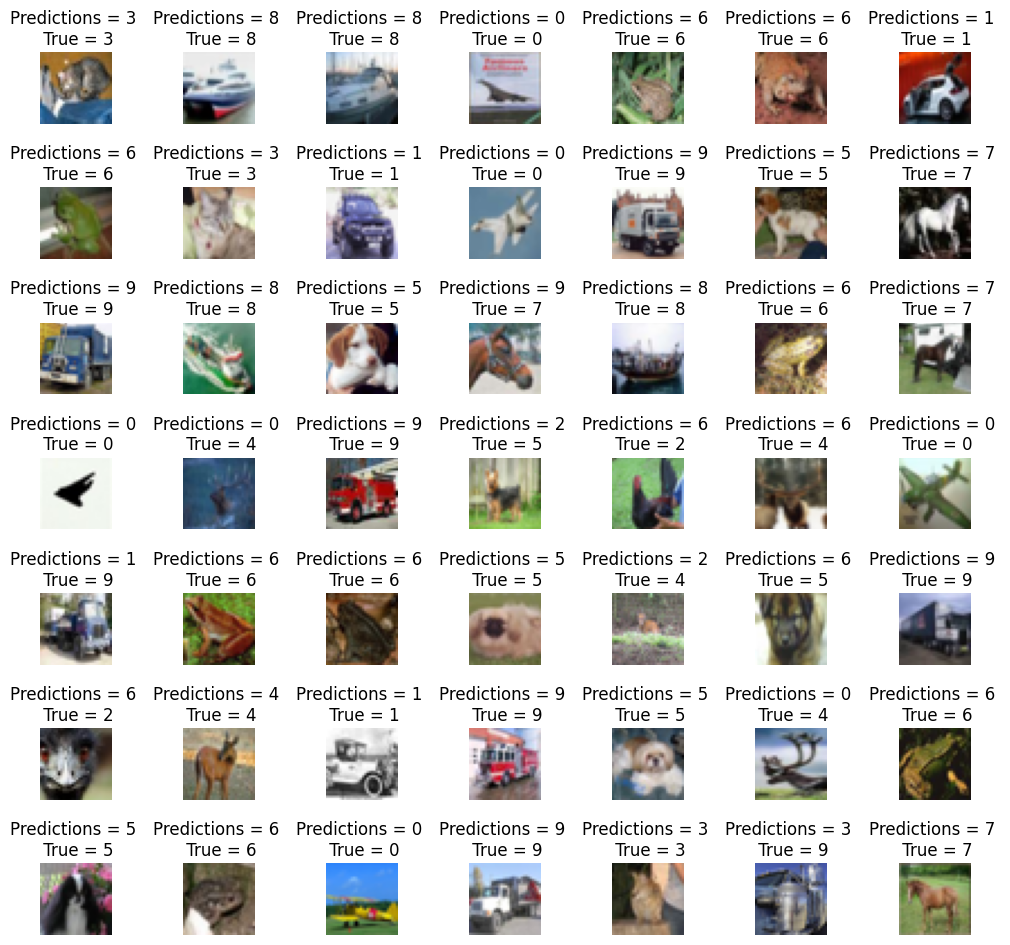

In [21]:
L = 7
W = 7
fig,axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in range(L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predictions = {predicted_classes[i]} \n True = {y_test[i]}")
    axes[i].axis("off")
    
    
plt.subplots_adjust(wspace=1)

In [22]:
cm = confusion_matrix(y_test,predicted_classes)
cm

array([[732,  29,  19,   6,   4,   1,  11,   3, 184,  11],
       [ 30, 861,   2,   1,   1,   0,  11,   0,  68,  26],
       [180,  10, 525,  35,  29,  30, 116,  14,  55,   6],
       [ 68,  35, 103, 361,  19, 100, 205,  31,  63,  15],
       [101,   9, 187,  52, 306,  16, 206,  86,  33,   4],
       [ 40,  16, 128, 165,  17, 405, 123,  47,  51,   8],
       [ 12,  13,  45,  43,   9,   5, 840,   2,  27,   4],
       [ 63,  12,  97,  35,  27,  37,  49, 649,   9,  22],
       [ 63,  28,   5,   5,   1,   3,  11,   2, 880,   2],
       [ 66, 222,   7,  10,   0,   2,  28,   7,  88, 570]], dtype=int64)

<AxesSubplot: >

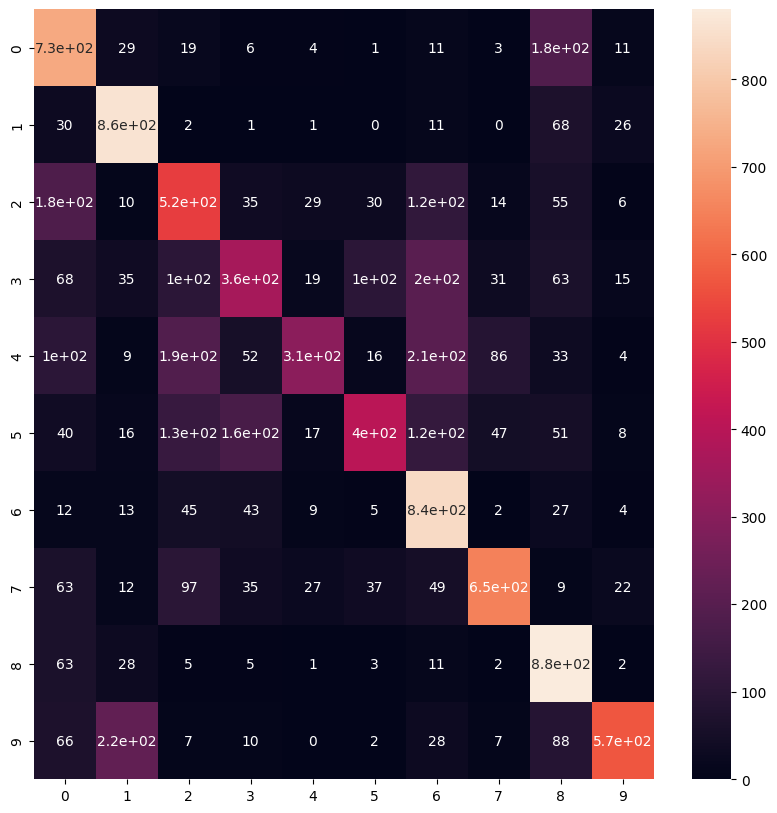

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [24]:
dir = os.path.join(os.getcwd(),'saved_models')
if not os.path.isdir(dir):
    os.makedirs(dir)
path = os.path.join(dir,'keras_cifar10_trained_model.h5')
cnn.save(path)

In [25]:
xtr = np.load("X_train.npy")
xte = np.load("X_test.npy")
ytr = np.load("y_train.npy")
yte = np.load("y_test.npy")

In [26]:
xtr = xtr.astype("float32")
xte = xte.astype("float32")

In [27]:
xtr.shape

(50000, 32, 32, 3)

In [28]:
datagen = ImageDataGenerator(rotation_range=90,width_shift_range=.1,horizontal_flip=True,vertical_flip=True)

In [29]:
datagen.fit(X_train)

In [30]:
cnn.fit_generator(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=2)

C:\Users\Amr\AppData\Local\Temp\ipykernel_7364\1602849382.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(


Epoch 1/2
1563/1563 [==============================] - 362s 231ms/step - loss: 1.6774 - accuracy: 0.3991
Epoch 2/2
1563/1563 [==============================] - 359s 230ms/step - loss: 1.5751 - accuracy: 0.4406


In [31]:
y_test_one_hot = to_categorical(y_test, num_classes=10)
score = cnn.evaluate(X_test, y_test_one_hot)
print(f'Test Accuracy: {score[1]:.2f}')


313/313 [==============================] - 21s 65ms/step - loss: 1.3724 - accuracy: 0.5209
Test Accuracy: 0.52


In [32]:
dir = os.path.join(os.getcwd(),'saved_models')
if not os.path.isdir(dir):
    os.makedirs(dir)
path = os.path.join(dir,'keras_cifar10_trained_model2.h5')
cnn.save(path)